# Atividade de Programação - Qual o próximo hit do Spotify?
## Instruções

Imagine que você foi contratado por uma das maiores gravadoras do mundo. Sua missão? Desenvolver um modelo preditivo que antecipe o próximo grande sucesso musical no Spotify. A gravadora, que já lançou grandes artistas e hits globais, está buscando maneiras de otimizar seus investimentos e estratégias de marketing, apostando nos talentos certos e maximizando o impacto das suas músicas. Para isso, eles precisam de um modelo robusto e preciso, capaz de prever a popularidade de uma canção antes mesmo de ela ser lançada.

Você receberá uma base de dados de mais de 100 mil músicas, cada uma contendo uma série de características acústicas, metadados, e informações de popularidade extraídas diretamente do Spotify. Com esses dados, a gravadora espera que você entregue insights valiosos e um modelo preditivo que possa ser integrado às suas operações.

**Objetivo**

Seu objetivo é criar um modelo de machine learning que preveja a popularidade de uma música no Spotify. Este modelo ajudará a gravadora a tomar decisões mais informadas sobre onde investir seus recursos, quais artistas promover e quais faixas têm maior potencial de se tornarem virais.

**Dados Disponíveis**

Você terá acesso a um rico conjunto de dados com mais de 100 mil músicas do Spotify. Essas músicas vêm com uma variedade de features, incluindo características acústicas (como energia, valência, tempo, etc.), metadados (como gênero, ano de lançamento, etc.) e um índice de popularidade medido diretamente pelo Spotify.

**Entregáveis**

- Notebook Completo: Um notebook Jupyter documentando todo o processo, desde a exploração dos dados até a criação e avaliação do modelo.
- Arquivo CSV de resultados: Submeta os resultados em csv do seu melhor modelo treinado, conforme template disponibilizado.

Seja o arquiteto do próximo grande hit!

### 1. Importação das Bibliotecas

O primeiro passo para a construção desse modelo preditivo consiste na importação das bibliotecas, que é um processo responsável por carregar funcionalidades de um pacote externo para uso no projeto. As bibliotecas contêm módulos com funções, classes e métodos que facilitam várias tarefas (como manipulação de dados, visualização e modelagem). Dessa forma, as bibliotecas utilizadas nesse notebook consistiu em:

1. **pandas as pd:** O pandas é uma biblioteca usada para manipular e analisar dados em Python, fornecendo estruturas de dados como DataFrame e Series, para carregar dados, limpar, explorar e transformá-los para modelagem.

2. **numpy as np:** O numpy é uma biblioteca para computação numérica que fornece suporte para arrays multidimensionais e operações matemáticas, sendo utilizado em conjunto com pandas para cálculos numéricos ou manipulação de arrays.

3. **OneHotEncoder do sklearn.preprocessing:** O OneHotEncoder é usado para transformar variáveis categóricas em vetores binários (one-hot encoding), tornando-as adequadas para uso em modelos de machine learning. Cada categoria é transformada em uma coluna separada, preenchida com 1 ou 0 para indicar a presença da categoria.

4. **matplotlib.pyplot as plt:** O matplotlib é uma biblioteca para a criação de gráficos e visualizações em Python, como histogramas, dispersões, e heatmaps, facilitando a análise visual de dados.

5. **seaborn as sns:** O seaborn é uma biblioteca de visualização baseada no matplotlib que fornece funções para criar gráficos estatísticos, permitindo a criação de gráficos mais estilizados e interpretações visuais mais detalhadas para análise de dados, como correlações e distribuições.

6. **train_test_split do sklearn.model_selection:** O train_test_split é usado para dividir os dados em conjuntos de treino e validação (ou teste), ajudando a avaliar o desempenho do modelo de forma imparcial, garantindo que o modelo não seja avaliado nos mesmos dados em que foi treinado.

7. **RandomForestClassifier do sklearn.ensemble:** O RandomForestClassifier é um modelo de aprendizado de máquina que utiliza uma combinação de várias árvores de decisão para melhorar a precisão da classificação, sendo um método para tarefas de classificação e regressão.

8. **accuracy_score, precision_score, recall_score, f1_score, classification_report do sklearn.metrics:** são funções usadas para avaliar o desempenho do modelo:
     - **accuracy_score:** Mede a acurácia geral do modelo (proporção de previsões corretas).
     - **precision_score:** Mede a precisão (proporção de previsões positivas corretas).
     - **recall_score:** Mede a sensibilidade ou recall (proporção de positivos reais corretamente identificados).
     - **f1_score:** Combinação de precisão e recall (métrica balanceada).
     - **classification_report:** Fornece um relatório completo das métricas de classificação (precisão, recall, F1-score) por classe.

9. **GridSearchCV do sklearn.model_selection:** O GridSearchCV é utilizado para otimizar hiperparâmetros de modelos de machine learning, realizando uma busca em uma grade de combinações de parâmetros, treinando e avaliando o modelo para encontrar a melhor combinação possível.

Sendo assim, foram feita a importação de todas essas bibliotecas, conforme consta na célula abaixo.

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### 2. Carregamento do Dataset

**Objetivo da Célula:**

Esta célula faz a análise inicial do dataset de treinamento carregando o arquivo CSV e visualizar as primeiras 5 entradas do dataset.

**Passo a Passo do Código:**

1. **Carregar o Dataset de Treinamento:**
   - O arquivo `train.csv` é carregado em um DataFrame para ``análise``.
   - O método `.head()` é utilizado para exibir as primeiras linhas, fornecendo uma visão geral das variáveis e seus tipos.


In [35]:
# Carregando o arquivo de treinamento para inspeção inicial
train_data = pd.read_csv('train.csv')

# Exibindo as primeiras linhas do dataset para análise inicial
train_data.head()


,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


### 3. Análise dos Dados

**Objetivo da Célula:**
O objetivo é verificar a estrutura dos dados e realizar uma análise preliminar para identificar possíveis problemas, como valores nulos ou inconsistências.

**Passo a Passo do Código:**

1. **Verificar Valores Nulos:**
   - O método `.isnull().sum()` é utilizado para contar valores nulos em cada coluna.
   - Exibe apenas as colunas com valores nulos, caso existam, para identificação de possíveis problemas.

2. **Analisar Estatísticas Descritivas:**
   - O método `.describe()` gera estatísticas descritivas (média, desvio padrão, mínimo, máximo) para as variáveis numéricas, ajudando a entender a distribuição dos dados.

In [36]:
# Verificando valores nulos no dataset
missing_values = train_data.isnull().sum()

# Exibindo colunas com valores nulos (se houver)
print(missing_values[missing_values > 0])

# Analisando estatísticas descritivas para variáveis numéricas
descriptive_stats = train_data.describe()

descriptive_stats

Series([], dtype: int64)


,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


### 4. Análise de Distribuição de Variáveis Categóricas

**Objetivo da Célula:**
Verificar a distribuição das variáveis categóricas para entender suas frequências e identificar possíveis desequilíbrios ou padrões importantes.

**Passo a Passo do Código:**

1. **Identificar Variáveis Categóricas:**
   - São selecionadas as variáveis categóricas de interesse para análise: `explicit`, `key`, `mode`, `time_signature`, `track_genre`.

2. **Calcular Distribuição:**
   - Para cada variável categórica, é calculada a distribuição de frequências (contagem de valores).

3. **Visualizar Distribuição:**
   - As distribuições são exibidas para cada variável categórica, ajudando a identificar padrões ou valores dominantes.

In [37]:
# Verificando a distribuição das variáveis categóricas
categorical_columns = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

# Análise de distribuição para variáveis categóricas
categorical_distributions = {}
for col in categorical_columns:
    categorical_distributions[col] = train_data[col].value_counts()

# Exibindo a distribuição das variáveis categóricas
categorical_distributions


{'explicit': explicit
 False    72962
 True      6838
 Name: count, dtype: int64,
 'key': key
 7     9261
 0     9183
 2     8120
 9     7893
 1     7531
 5     6549
 11    6529
 4     6340
 6     5560
 10    5233
 8     5090
 3     2511
 Name: count, dtype: int64,
 'mode': mode
 1    50891
 0    28909
 Name: count, dtype: int64,
 'time_signature': time_signature
 4    71202
 3     6512
 5     1274
 1      710
 0      102
 Name: count, dtype: int64,
 'track_genre': track_genre
 progressive-house    738
 sad                  737
 world-music          729
 singer-songwriter    727
 swedish              726
                     ... 
 party                673
 goth                 672
 house                669
 grindcore            666
 idm                  658
 Name: count, Length: 114, dtype: int64}

### 5. Detecção e Tratamento de Outliers

**Objetivo da Célula:**
Identificar e tratar possíveis outliers em variáveis numéricas utilizando o método do IQR (Intervalo Interquartil), garantindo que dados atípicos não prejudiquem a modelagem.

**Passo a Passo do Código:**

1. **Função para Detecção de Outliers:**
   - Função `detect_outliers()` é definida para identificar valores que estão além de 1.5 vezes o IQR, calculando limites inferiores e superiores para cada variável.

2. **Detecção de Outliers:**
   - Possíveis outliers são detectados nas colunas `duration_ms` e `loudness`.

3. **Remoção de Outliers:**
   - Os outliers identificados são removidos do dataset original, e o tamanho do dataset é verificado após a limpeza.

In [38]:
# Definindo uma função para identificar possíveis outliers usando o método do IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detectando possíveis outliers para variáveis numéricas selecionadas
outliers_duration = detect_outliers(train_data['duration_ms'])
outliers_loudness = detect_outliers(train_data['loudness'])

# Exibindo contagem de possíveis outliers
len(outliers_duration), len(outliers_loudness)


(3990, 4351)

In [39]:
# Removendo outliers das colunas 'duration_ms' e 'loudness'
train_data_cleaned = train_data[~train_data['duration_ms'].isin(outliers_duration)]
train_data_cleaned = train_data_cleaned[~train_data_cleaned['loudness'].isin(outliers_loudness)]

# Verificando o tamanho do dataset após remoção dos outliers
train_data_cleaned.shape


(71876, 21)

### 6. Codificação de Variáveis Categóricas com One-Hot Encoding

**Objetivo da Célula:**
Transformar variáveis categóricas em variáveis numéricas através de One-Hot Encoding, preparando os dados para serem utilizados por modelos de machine learning.

**Passo a Passo do Código:**

1. **Selecionar Variáveis Categóricas para Codificação:**
   - As variáveis categóricas previamente identificadas são selecionadas para codificação.

2. **Aplicar One-Hot Encoding:**
   - `OneHotEncoder` do Scikit-learn é utilizado para criar variáveis dummy para cada categoria.
   - O resultado é convertido em um DataFrame e concatenado ao dataset original, removendo as variáveis categóricas originais.

3. **Verificar Dataset Final:**
   - O tamanho do dataset final é verificado e suas primeiras linhas são exibidas para confirmar a codificação correta.

In [40]:
# Aplicando One-Hot Encoding para variáveis categóricas
# Selecionando as colunas para codificação
categorical_features = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

# Criando uma instância do OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicando a codificação e convertendo para um DataFrame
encoded_features = encoder.fit_transform(train_data_cleaned[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combinando as colunas codificadas ao dataset original (removendo as colunas categóricas originais)
train_data_final = pd.concat([train_data_cleaned.drop(categorical_features, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Verificando o tamanho e as primeiras linhas do dataset final
train_data_final.shape, train_data_final.head()


((71876, 151),
    track_unique_id                track_id           artists  \
 0            41996  7hUhmkALyQ8SX9mJs5XI3D  Love and Rockets   
 1            76471  5x59U89ZnjZXuNAAlc8X1u  Filippa Giordano   
 2            54809  70Vng5jLzoJLmeLu3ayBQq     Susumu Yokota   
 3           109799  47d5lYjbiMy0EdMRV8lRou           Scooter   
 4            81987  6m1TWFMeon7ai9XLOzdbiR               BTS   
 
                album_name                              track_name  \
 0        Love and Rockets                              Motorcycle   
 1        Filippa Giordano  Addio del passato - From "La traviata"   
 2                  Symbol                      Purple Rose Minuet   
 3         Scooter Forever                            The Darkside   
 4  Love Yourself 轉 'Tear'                               FAKE LOVE   
 
    duration_ms  danceability  energy  loudness  speechiness  ...  \
 0       211533         0.305   0.849   -10.795       0.0549  ...   
 1       196000         0.287   0

### 7. Formulação de Hipóteses


#### Hipótese 1: Músicas com Maior "Valence" Tendem a Ser Mais Populares

**Explicação da Célula:**

A hipótese testada é que músicas com maior "valence" (positividade musical) são mais populares. A variável "valence" varia de 0.0 (faixa mais negativa) a 1.0 (faixa mais positiva), e a suposição é de que músicas mais "felizes" tendem a atrair um público maior e, portanto, são mais populares.

**Visualização:**

Para testar essa hipótese, foi criado um boxplot para comparar a distribuição de "valence" entre músicas populares (`popularity_target = 1`) e não populares (`popularity_target = 0`). O gráfico permite observar a mediana, o intervalo interquartil e possíveis outliers para cada grupo.

**Análise do Gráfico:**

- A distribuição de "valence" para músicas populares e não populares é bastante similar.
- **Mediana:** A mediana da "valence" é ligeiramente menor para músicas populares, o que indica que, em média, elas têm um tom um pouco menos positivo do que as músicas não populares.
- **Intervalo Interquartil:** O intervalo interquartil (IQR), que representa a faixa central de 50% dos dados, é bastante semelhante para ambos os grupos, indicando que a maioria das músicas tem níveis de "valence" próximos, independentemente de serem populares ou não.
- **Outliers:** Não há uma presença significativa de outliers, e a amplitude geral dos valores de "valence" é semelhante em ambos os grupos.

**Conclusão da Análise:**

A visualização não evidencia uma diferença clara entre músicas populares e não populares com relação à variável "valence". Isso sugere que, embora a positividade de uma faixa possa ter algum impacto na popularidade, outros fatores também desempenham um papel importante, ou essa variável isolada não é um forte indicador da popularidade.

O resultado desse boxplot não suporta completamente a hipótese inicial de que músicas mais positivas (com maior "valence") são significativamente mais populares, uma vez que as distribuições para os dois grupos são muito similares. Portanto, para uma análise mais conclusiva, é importante considerar outras variáveis e fatores que possam influenciar a popularidade de uma música.

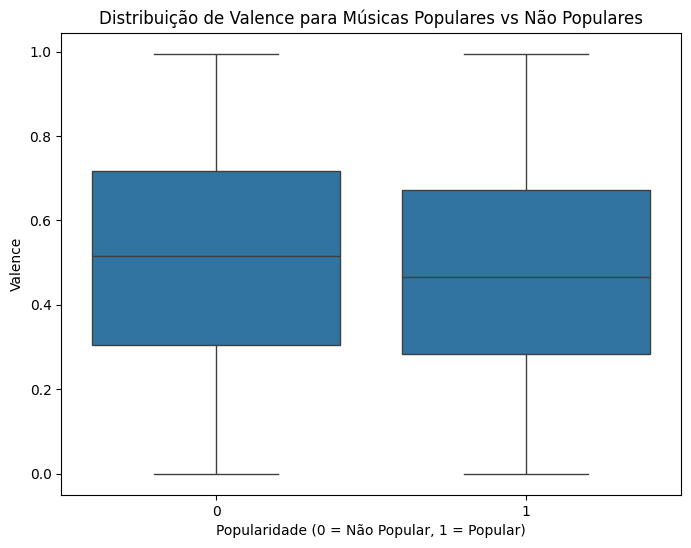

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma visualização para comparar valence com popularidade
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='valence', data=train_data_cleaned)
plt.title('Distribuição de Valence para Músicas Populares vs Não Populares')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Valence')
plt.show()


#### Hipótese 2: Músicas com Alta "Danceability" Têm Maior Chance de Serem Populares

**Explicação da Célula:**

A hipótese é que músicas com alta "danceability", ou seja, músicas que são mais fáceis de dançar (valores próximos de 1.0), têm uma maior chance de serem populares. Isso ocorre porque essas músicas podem ter maior apelo para ambientes sociais, como festas, clubes ou eventos, tornando-as mais suscetíveis a ganhar popularidade.

**Visualização:**

Foi criado um boxplot para comparar a distribuição da variável "danceability" entre músicas populares (`popularity_target = 1`) e não populares (`popularity_target = 0`). Este gráfico é útil para observar a mediana, intervalo interquartil, e outliers para os dois grupos, permitindo identificar diferenças na distribuição de "danceability".

**Análise do Gráfico:**

- **Mediana Similar:** A mediana de "danceability" é muito próxima para ambos os grupos de músicas populares e não populares, indicando que a tendência central de quão dançável é uma música não difere significativamente entre os grupos.
- **Intervalo Interquartil (IQR):** O IQR de "danceability" é ligeiramente mais alto para músicas populares, sugerindo que músicas populares têm uma distribuição um pouco mais ampla de valores de "danceability" quando comparadas a músicas não populares.
- **Outliers:** Em ambos os grupos, há a presença de outliers com valores muito baixos de "danceability". Isso indica que existem algumas músicas que são pouco dançáveis, independentemente de serem populares ou não.
- **Distribuição Semelhante:** No geral, a distribuição de "danceability" é similar para os dois grupos, com uma leve sugestão de que músicas populares têm uma ligeira tendência a serem mais "dançáveis" que as não populares.

**Conclusão da Análise:**

A visualização não fornece uma evidência forte para confirmar que músicas mais dançantes têm maior probabilidade de serem populares, embora haja uma leve tendência nesse sentido. A similaridade entre as distribuições de "danceability" para músicas populares e não populares sugere que, isoladamente, essa variável não é um forte preditor de popularidade. Portanto, é provável que outros fatores, além de "danceability", desempenhem um papel mais significativo na determinação da popularidade de uma música. 

Assim, a hipótese de que músicas mais dançáveis têm uma maior chance de serem populares não é refutada, mas não se apresenta como uma conclusão sólida com base apenas nesta análise visual.

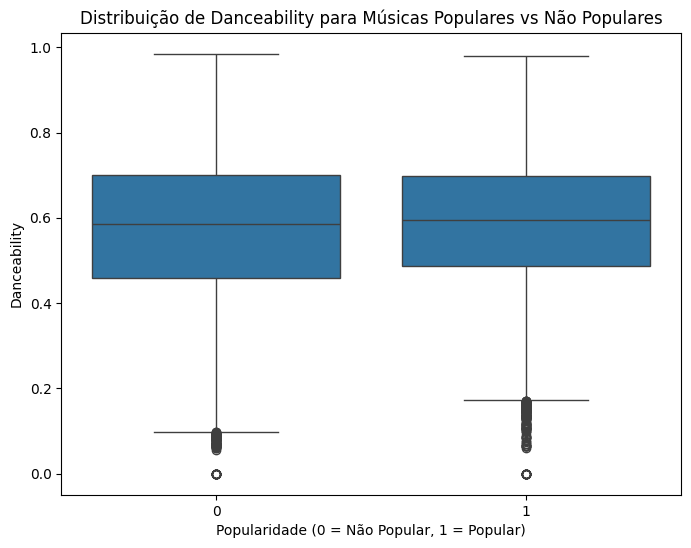

In [42]:
# Criar uma visualização para comparar danceability com popularidade
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='danceability', data=train_data_cleaned)
plt.title('Distribuição de Danceability para Músicas Populares vs Não Populares')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Danceability')
plt.show()


#### Hipótese 3: Músicas Explícitas Podem Ter Menos Chances de Serem Populares

**Explicação da Célula:**

A hipótese é que músicas com conteúdo explícito têm uma menor chance de se tornarem populares devido às possíveis restrições de exposição em plataformas de streaming ou rádio. Essas músicas podem ser menos acessíveis para certos públicos ou países, afetando sua capacidade de alcançar popularidade.

**Visualização:**

Um gráfico de barras foi criado para comparar a contagem de músicas explícitas (`True`) e não explícitas (`False`) para os dois grupos de popularidade (`popularity_target = 0` para músicas não populares e `popularity_target = 1` para músicas populares). O gráfico destaca a proporção de músicas explícitas e não explícitas dentro de cada grupo de popularidade.

**Análise do Gráfico:**

- **Predominância de Músicas Não Explícitas:** Tanto no grupo de músicas populares quanto no de não populares, a maioria das músicas não possui conteúdo explícito (barras azuis). Isso indica que músicas explícitas representam uma proporção relativamente pequena do total, independentemente do nível de popularidade.
- **Proporção Similar de Músicas Explícitas:** A proporção de músicas explícitas (barras laranjas) é similar para ambos os grupos de popularidade. Isso sugere que o fato de uma música ser explícita ou não explícita não influencia de forma significativa se ela será popular ou não.
- **Baixa Contagem Absoluta de Músicas Explícitas:** Músicas explícitas têm uma contagem absoluta menor em relação às não explícitas em ambos os grupos, indicando que músicas com conteúdo explícito são, em geral, menos comuns no dataset analisado.

**Conclusão da Análise:**

A visualização não fornece uma evidência forte para apoiar a hipótese de que músicas explícitas têm menos chances de serem populares. A proporção de músicas explícitas é relativamente baixa para ambos os grupos (populares e não populares), e a similaridade entre os dois grupos sugere que a presença de conteúdo explícito por si só não é um fator determinante para a popularidade de uma música.

No entanto, a baixa contagem de músicas explícitas no dataset pode ser uma possível razão para essa falta de evidência. Assim, pode ser interessante explorar outros fatores em conjunto com a presença de conteúdo explícito para entender melhor o impacto na popularidade.

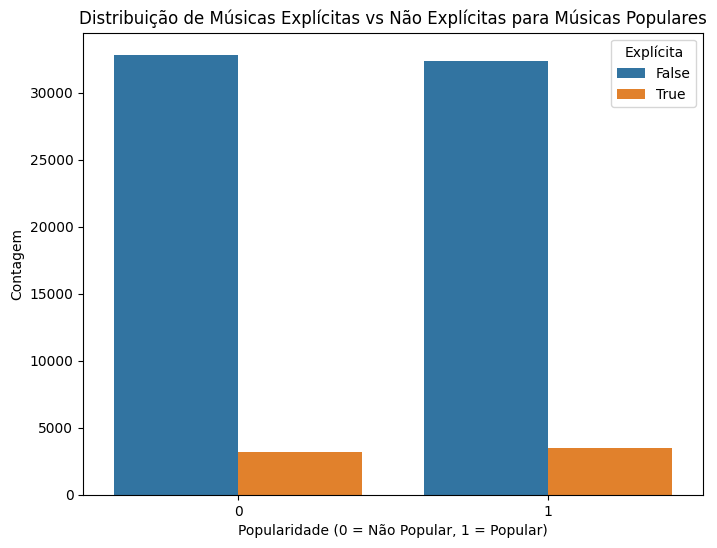

In [43]:
# Criar uma visualização para comparar músicas explícitas com popularidade
plt.figure(figsize=(8, 6))
sns.countplot(x='popularity_target', hue='explicit', data=train_data_cleaned)
plt.title('Distribuição de Músicas Explícitas vs Não Explícitas para Músicas Populares')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Contagem')
plt.legend(title='Explícita')
plt.show()


### 7. Análise de Correlação para Seleção de Features

**Objetivo da Célula:**
Calcular e visualizar a correlação entre variáveis numéricas e a variável-alvo `popularity_target`, a fim de identificar as features mais relevantes para a modelagem.

**Passo a Passo do Código:**

1. **Calcular Matriz de Correlação:**
   - A matriz de correlação é calculada para todas as variáveis numéricas.

2. **Visualizar Correlação com a Variável-Alvo:**
   - Um heatmap é gerado para visualizar as correlações das variáveis numéricas com a variável `popularity_target`.

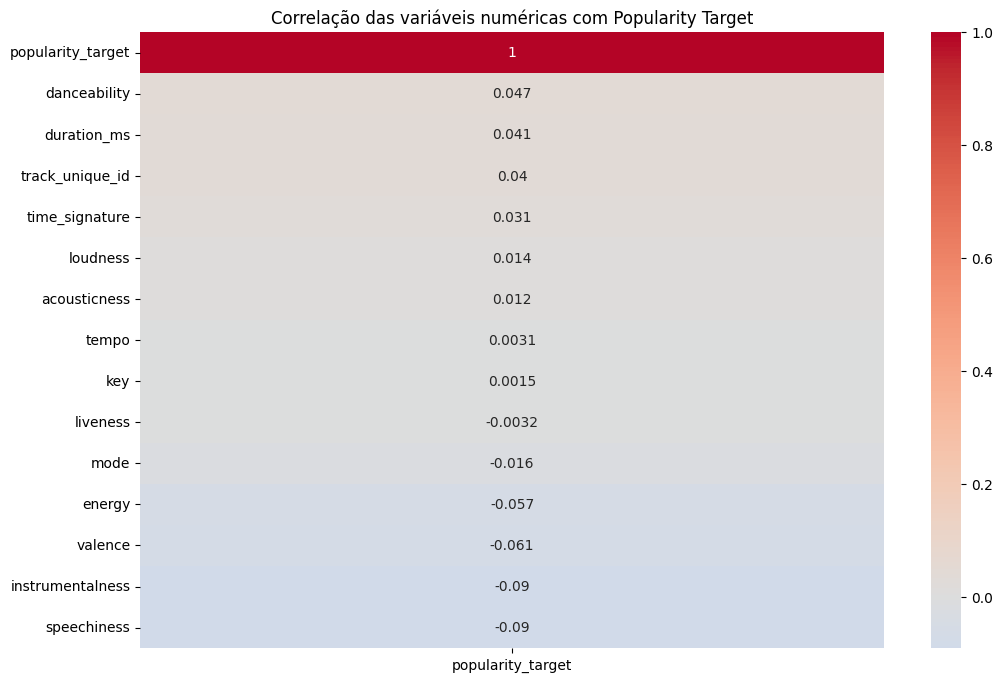

In [44]:
# Calculando a matriz de correlação para variáveis numéricas
numerical_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('popularity_target')  # Excluindo a coluna-alvo para análise separada
corr_matrix = train_data_cleaned[numerical_columns + ['popularity_target']].corr()

# Plotando um heatmap para visualizar correlações com a variável-alvo 'popularity_target'
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['popularity_target']].sort_values(by='popularity_target', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlação das variáveis numéricas com Popularity Target')
plt.show()


### 8. Seleção de Features para Modelagem

**Objetivo da Célula:**
Selecionar as features mais relevantes para a modelagem, garantindo que o modelo seja treinado com variáveis que têm maior impacto na previsão da popularidade.

**Passo a Passo do Código:**

1. **Selecionar Features Mais Relevantes:**
   - Com base na análise de correlação e entendimento dos dados, as features mais relevantes são selecionadas, incluindo variáveis dummy de gêneros.

2. **Extrair Features e Variável-Alvo:**
   - As variáveis independentes (`X`) e a variável-alvo (`y`) são separadas para preparação do modelo.

3. **Dividir Dataset em Treino e Teste:**
   - O dataset é dividido em 80% para treino e 20% para validação, permitindo avaliar a performance do modelo.

In [45]:
# Selecionando as features mais relevantes para o modelo
selected_features = [
    'valence', 'danceability', 'energy', 'instrumentalness', 'loudness', 
    'explicit_True', 'explicit_False', 'mode_0', 'mode_1', 'key_0', 'key_1',
    'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
    'key_10', 'key_11', 'time_signature_3', 'time_signature_4', 'time_signature_5'
]

# Adicionando as variáveis dummy de gênero
genre_columns = [col for col in train_data_final.columns if col.startswith('track_genre')]
selected_features.extend(genre_columns)

# Extraindo as features e a variável alvo
X = train_data_final[selected_features]
y = train_data_final['popularity_target']

# Dividindo o dataset em treino e teste (80% treino, 20% teste)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape


((57500, 138), (14376, 138))

### 9. Treinamento de Modelo com Random Forest

**Objetivo da Célula:**
Treinar um modelo de Random Forest para prever a popularidade, avaliando sua performance através de métricas como acurácia, precisão, recall, e F1-score.

**Passo a Passo do Código:**

1. **Inicializar o Modelo:**
   - `RandomForestClassifier` é inicializado com um `random_state` para garantir reprodutibilidade.

2. **Treinar o Modelo:**
   - O modelo é treinado com os dados de treino (`X_train`, `y_train`).

3. **Fazer Previsões e Avaliar Desempenho:**
   - O modelo faz previsões no conjunto de validação, e métricas de performance são calculadas e exibidas.

In [46]:
# Inicializando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_val)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)
print(classification_rep)

0.8125347801892042
0.8105263157894737
0.8069678515790965
0.8087431693989071
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7315
           1       0.81      0.81      0.81      7061

    accuracy                           0.81     14376
   macro avg       0.81      0.81      0.81     14376
weighted avg       0.81      0.81      0.81     14376



### 10. Ajuste Fino de Hiperparâmetros com GridSearchCV

**Objetivo da Célula:**
Melhorar a performance do modelo Random Forest ajustando seus hiperparâmetros através de uma busca em grade (GridSearchCV), a fim de encontrar a combinação ideal de parâmetros que maximize a acurácia.

**Passo a Passo do Código:**

1. **Definir Modelo Base:**
   - O modelo Random Forest (`RandomForestClassifier`) é definido com um `random_state` para garantir reprodutibilidade.

2. **Definir Espaço de Busca para Hiperparâmetros:**
   - É configurado um dicionário de parâmetros (`param_grid`) para explorar diferentes combinações:
     - `n_estimators`: Número de árvores na floresta (100, 200, 300).
     - `max_depth`: Profundidade máxima das árvores (10, 20, sem limite).
     - `min_samples_split`: Número mínimo de amostras necessárias para dividir um nó (2, 5, 10).

3. **Configurar GridSearchCV:**
   - `GridSearchCV` é utilizado para testar todas as combinações possíveis de hiperparâmetros, realizando uma validação cruzada (`cv=3`) para cada combinação e avaliando a performance usando acurácia (`scoring='accuracy'`).
   - `n_jobs=-1` é usado para paralelizar a busca e acelerar o processo.

4. **Treinar GridSearchCV:**
   - A busca em grade é treinada com os dados de treino (`X_train`, `y_train`), testando cada combinação de hiperparâmetros.

5. **Obter Melhor Conjunto de Hiperparâmetros:**
   - A melhor combinação de hiperparâmetros encontrada é exibida pelo método `.best_params_`.

6. **Avaliar Modelo Otimizado:**
   - O melhor modelo (`best_model`) encontrado pela busca em grade é avaliado no conjunto de validação (`X_val`, `y_val`).
   - A acurácia após o ajuste fino é calculada e exibida para verificar a melhoria de performance.

In [47]:
# Definindo o modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definindo o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Avaliando o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_val, y_val)
print("Acurácia após ajuste fino:", accuracy)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Acurácia após ajuste fino: 0.8150389538119087


### 10. Transformação e Previsões no Conjunto de Teste

**Objetivo da Célula:**
Aplicar o modelo treinado e otimizado no conjunto de teste para fazer previsões finais e preparar o arquivo de submissão.

**Passo a Passo do Código:**

1. **Carregar Conjunto de Teste e Transformar Dados:**
   - O conjunto de teste é carregado, e o One-Hot Encoding treinado é aplicado.

2. **Alinhar Colunas com Conjunto de Treinamento:**
   - O conjunto de teste é ajustado para garantir que suas colunas estejam alinhadas com o conjunto de treino.

3. **Fazer Previsões e Criar Arquivo de Submissão:**
   - O modelo treinado faz previsões no conjunto de teste, e os resultados são salvos em um arquivo CSV para submissão.

In [49]:
# Carregar o conjunto de teste
test_data = pd.read_csv('test.csv')

# Aplicar a transformação do One-Hot Encoding já treinado no conjunto de treino
encoded_test_features = encoder.transform(test_data[categorical_features])
encoded_test_df = pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_features))

# Combinando as colunas codificadas ao dataset original (removendo as colunas categóricas originais)
test_data_final = pd.concat([test_data.drop(categorical_features, axis=1).reset_index(drop=True), encoded_test_df.reset_index(drop=True)], axis=1)

# Garantir que as colunas do conjunto de teste estejam alinhadas com as do conjunto de treino
missing_cols = set(X_train.columns) - set(test_data_final.columns)
for col in missing_cols:
    test_data_final[col] = 0  # Adiciona colunas ausentes no teste com valor 0

test_data_final = test_data_final[X_train.columns]  # Reordenar para alinhar com X_train

# Fazer as previsões usando o modelo treinado
test_predictions = best_model.predict(test_data_final)

# Criar o DataFrame de submissão com apenas as colunas necessárias
submission = pd.DataFrame({
    'track_unique_id': test_data['track_unique_id'],
    'popularity_target': test_predictions
})

# Salvar o arquivo .csv
submission.to_csv('submission.csv', index=False)